In [10]:
#%pylab qt
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import matplotlib.animation as animation

Este código realiza el cálculo de la raíz para encontrar el tiempo de la curva braquistócrona utilizando los métodos de bisección, punto fijo,  Newton-Raphson y secante:

1. La función `f(x)` define la ecuación que se desea resolver para encontrar la raíz. En este caso, la ecuación corresponde a la expresión matemática de la curva braquistócrona.

2. Se crea un conjunto de valores de \( x \) utilizando `np.arange(0,10, 0.001)` para generar valores de lambda (\( \lambda \)) en el intervalo de [0, 10].

3. Se realiza una representación gráfica de la función `f(x)` en el intervalo dado y se grafica la línea \( y = 0 \) para visualizar las raíces de la función.

4. La función `biseccion(f,a,b,tol)` implementa el método de bisección para encontrar la raíz de la función \( f(x) \) en el intervalo [a, b] con una tolerancia dada `tol`.

5. Dentro de la función de bisección, se utiliza un bucle `while` para iterar hasta que se cumpla la condición de convergencia, es decir, hasta que el valor de la función en el punto medio del intervalo sea menor que la tolerancia.

6. En cada iteración, se actualiza el intervalo [a, b] dividiéndolo en dos partes y se determina en qué subintervalo se encuentra la raíz.

7. Una vez que se alcanza la convergencia, se imprime el número de iteraciones necesarias para encontrar la raíz.

8. Finalmente, se calcula la raíz llamando a la función `biseccion` con los parámetros adecuados y se imprime el resultado junto con la tolerancia obtenida.


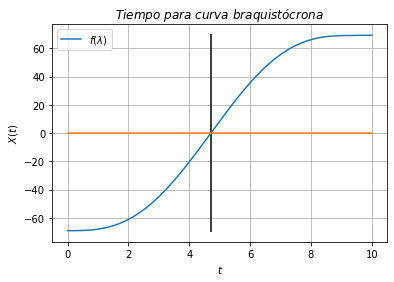

Raiz encontrada en 46 iteraciones
Raiz encontrada 4.707212057760245
Tolerancia obtenida 8.526512829121202e-14


In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función que representa la ecuación de la curva braquistócrona
def f(x):
    return 22 * np.sqrt(9.8/22)*x - 22 * np.sin(np.sqrt(9.8/22)*x ) - 69.12

# Generación de valores de lambda en el intervalo [0, 10]
x = np.arange(0, 10, 0.001)

# Gráfica de la función f(x) y la línea y=0
plt.plot(x, f(x), label='$f(\lambda$)')
plt.plot([0, 10], [0, 0])  # Línea y=0
plt.title('$Tiempo\,\, para\,\, curva\,\, braquistócrona$')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.vlines(4.7072, -70, 70)  # Línea vertical en la raíz conocida
plt.legend()
plt.grid()
plt.show()

# Definición de la función que implementa el método de bisección
def biseccion(f, a, b, tol):
    # Verificar si f(a) y f(b) tienen signos contrarios
    if f(a) * f(b) > 0:
        return 'Error f(a) y f(b), deben tener signos contrarios'
    
    # Inicialización de variables
    p = (a + b) / 2
    n = 0
    
    # Bucle para iterar hasta converger a la raíz dentro de la tolerancia dada
    while abs(f(p)) > tol:
        if f(a) * f(p) < 0:
            b = p
        if f(p) * f(b) < 0:
            a = p
        p = (a + b) / 2
        n += 1
    
    # Imprimir el número de iteraciones necesarias para encontrar la raíz
    print('Raiz encontrada en', n, 'iteraciones')
    
    return p

# Definición de la tolerancia
tol = 1e-13

# Llamada a la función de bisección para encontrar la raíz en el intervalo [2, 6]
root_biseccion = biseccion(f, 2, 6, tol)

# Imprimir la raíz encontrada y la tolerancia obtenida en ese punto
print('Raiz encontrada', root_biseccion)
print('Tolerancia obtenida', f(root_biseccion))


La raiz por punto fijo es: -4061142119257.306
La tolerancia por punto fijo: 59631065037005.92


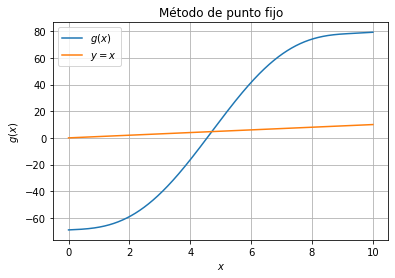

In [3]:
# Método de punto fijo para encontrar la raíz de una función
def punto_fijo(f, p0, Nmax):
    # Definir la función iterativa g(x)
    def g(x):
        return f(x) + x
    
    # Inicializar el punto inicial y el contador de iteraciones
    p = p0
    n = 0
    
    # Iterar hasta alcanzar el número máximo de iteraciones
    while n < Nmax:
        p = g(p)  # Aplicar la función iterativa g(x)
        n += 1    # Incrementar el contador de iteraciones
        
    return p  # Devolver la aproximación de la raíz

# Definir el número máximo de iteraciones
Npf = 10

# Calcular la raíz utilizando el método de punto fijo
root_pf = punto_fijo(f, 1, Npf)

# Definir la función g(x) = f(x) + x para graficar
g = f(x) + x

# Imprimir el resultado y la tolerancia obtenida
print('La raiz por punto fijo es:', root_pf)
print('La tolerancia por punto fijo:', abs(f(root_pf)))

# Graficar la función g(x) y la función identidad y=x
plt.plot(x, g, label='$g(x)$')  # Gráfico de g(x)
plt.plot(x, x, label='$y=x$')   # Gráfico de y=x
plt.title('Método de punto fijo')    # Título del gráfico
plt.xlabel('$x$')                   # Etiqueta del eje x
plt.ylabel('$g(x)$')                # Etiqueta del eje y
plt.legend()                        # Mostrar leyenda
plt.grid()                          # Mostrar rejilla
plt.show()                          # Mostrar gráfico
# Nota: no converge.

In [4]:
# Método de Newton-Raphson para encontrar la raíz de una función
def f(x):
    return 22 * np.sqrt(9.8/22)*x - 22 * np.sin(np.sqrt(9.8/22)*x ) - 69.12

# Derivada de la función f(x)
def df(x):
    return 22 * np.sqrt(9.8/22) - 22* np.sqrt(9.8/22) * np.cos(np.sqrt(9.8/22)*x)

# Función para aplicar el método de Newton-Raphson
def newton_raphson(p0, tol):
    n = 0
    p = p0
    
    # Iterar hasta que se alcance la tolerancia deseada
    while abs(f(p)) > tol:
        p = p - f(p) / df(p)  # Calcular el siguiente punto usando la fórmula de Newton-Raphson
        n += 1  # Incrementar el contador de iteraciones
        
    print('Raiz encontrada en ', n, 'iteraciones')
    
    return p

# Definir la tolerancia
tol_nr = 1e-13

# Calcular la raíz utilizando el método de Newton-Raphson
root_nr = newton_raphson(1, tol_nr)

# Imprimir la raíz encontrada
print('Raiz encontrada por Newton-Raphson es', root_nr)


Raiz encontrada en  24881 iteraciones
Raiz encontrada por Newton-Raphson es 4.707212057760242


In [5]:
# Método de la secante para encontrar la raíz de una función
def secante(f, p0, p1, resolution):
    n = 0
    
    pn_1 = p1
    pn_2 = p0
    
    # Iterar hasta que la diferencia entre dos aproximaciones consecutivas sea menor que la resolución especificada
    while abs(pn_1 - pn_2) > resolution:
        
        # Calcular el siguiente punto usando la fórmula de la secante
        pn = pn_1 - (f(pn_1) * (pn_1 - pn_2)) / (f(pn_1) - f(pn_2))
        
        # Actualizar los puntos para la siguiente iteración
        pn_2 = pn_1
        pn_1 = pn
        
        n += 1  # Incrementar el contador de iteraciones
        
    print('Raiz encontrada en', n, 'iteraciones')
    
    return pn

# Definir la resolución
res_sec = 1e-8

# Calcular la raíz utilizando el método de la secante
root_sec = secante(f, 1, 6, res_sec)

# Imprimir la tolerancia y la raíz encontrada por el método de la secante
print('Tolerancia por Secante es:', abs(f(root_sec)))
print('La Raiz encontrada por secante es:', root_sec)


Raiz encontrada en 5 iteraciones
Tolerancia por Secante es: 0.0
La Raiz encontrada por secante es: 4.707212057760242


El siguiente código calcula la integral de una función específica utilizando dos métodos de integración numérica (Simpson y trapecio), así como también la integral exacta utilizando la biblioteca Sympy. Aquí está el análisis detallado:

1. Se importan las bibliotecas necesarias: `numpy`, `matplotlib.pyplot` y `sympy`.

2. Se define la función `Ar_simp(f,a,b)` que calcula la integral utilizando el método de Simpson. Este método divide el intervalo de integración en segmentos más pequeños y aplica una fórmula para aproximar el área bajo la curva.

3. Se define la función `Ar_trap(f,a,b)` que calcula la integral utilizando el método del trapecio. Este método aproxima el área bajo la curva mediante el área de los trapecios formados por los puntos de la función y los ejes x.

4. Se define el símbolo `x` como una variable simbólica.

5. Se establecen los límites de integración `a` y `b`, que son utilizados en el cálculo de las integrales.

6. Se define una serie de operaciones para encontrar una función \( f(x) \) que se utilizará para calcular la integral. La función \( f(x) \) se compone de dos partes \( f_1(x) \) y \( f_2(x) \).

7. Se utiliza un bucle `for` para calcular los primeros cinco términos de la expansión en serie de Taylor de una función `gs` alrededor de `x=a`. Esto se utiliza para construir una aproximación \( P_4(x) \) de \( gs(x) \).

8. Se definen las funciones `f1(x)` y `f2(x)` utilizando las aproximaciones encontradas anteriormente.

9. Se define la función `f1cor(x)` que ajusta `f1(x)` para evitar problemas numéricos cuando `x` es igual a `a`.

10. Se calculan las integrales utilizando el método de Simpson (`Ar_simp`) y el método del trapecio (`Ar_trap`). También se calcula la integral exacta utilizando la función `integrate` de Sympy.

11. Se imprimen los resultados de las integrales calculadas utilizando los métodos de Simpson y del trapecio, y se imprime el tiempo calculado para una trayectoria circular.

In [8]:
# Función para calcular la integral utilizando el método de Simpson
def Ar_simp(f, a, b):
    xn = np.linspace(a, b, 3)  # División del intervalo en 3 partes
    h = xn[1] - xn[0]  # Calcula el tamaño de cada subintervalo
    
    # Aplicación de la fórmula de Simpson
    return (h / 3) * (f(xn[0]) + 4 * f(xn[1]) + f(xn[2]))

# Función para calcular la integral utilizando el método del trapecio
def Ar_trap(f, a, b):
    # Aplicación de la fórmula del trapecio
    return 0.5 * (b - a) * (f(a) + f(b))

# Definición del símbolo x para usar en las funciones
x = Symbol('x')

# Definición de los límites de integración
a = 3.58
b = 3/2 * np.pi

# Definición de las funciones para calcular las integrales
gs = 1
den = sqrt(cos(x) - cos(3.58))
P4 = 0

# Cálculo de los primeros cinco términos de la serie de Taylor de gs alrededor de x=a
for i in range(5):
    dgs = diff(gs, x, i)
    P4 += dgs.subs(x, a) * (x - a)**i

# Construcción de las funciones f1(x) y f2(x) utilizando las aproximaciones encontradas
f1s = (gs - P4) / den
f2s = (P4) / den

# Conversión de las funciones a funciones numpy para su uso posterior
f1 = lambdify(x, f1s, 'numpy')
f2 = lambdify(x, f2s, 'numpy')

# Definición de la función completa fs(x)
fs = gs / den
f = lambdify(x, fs, 'numpy')

# Función para corregir f1(x) para evitar problemas numéricos
def f1cor(x):
    if x == a:
        return 0
    else:
        return f1(x)

# Cálculo de las integrales utilizando el método de Simpson y el método del trapecio
intf1 = Ar_simp(f1cor, a, b)
intf11 = Ar_trap(f1cor, a, b)

# Cálculo de la integral exacta utilizando la biblioteca sympy
intf2 = integrate(f2s, (x, a, b))
intf = integrate(1 / sqrt(cos(x) - cos(3.58)), (x, 3.58, 3/2 * pi))

# Impresión de los resultados de las integrales calculadas y el tiempo calculado para una trayectoria circular
print('Integral calculada para trayectoria circular usando Simpson:', intf1 + intf2.evalf()) 
print('Integral calculada para trayectoria circular usando Trapecio:', intf11 + intf2.evalf())
print('Tiempo calculado para trayectoria circular:', 2.864256 * sqrt(76.5 / (2 * 9.8)), 's')


Integral calculada para trayectoria circular usando Simpson: 2.864256 - 8.114923e-9*I
Integral calculada para trayectoria circular usando Trapecio: 2.864256 - 8.114923e-9*I
Tiempo calculado para trayectoria circular: 5.65867189908598 s


El siguiente código crea una animación que muestra tres trayectorias diferentes en un plano XY: una línea recta, una curva braquistócrona y una circunferencia. Cada trayectoria se actualiza en cada frame de la animación. El resultado es una visualización dinámica de las tres trayectorias, lo que permite comparar sus formas y características mientras el tiempo avanza.

<IPython.core.display.Javascript object>


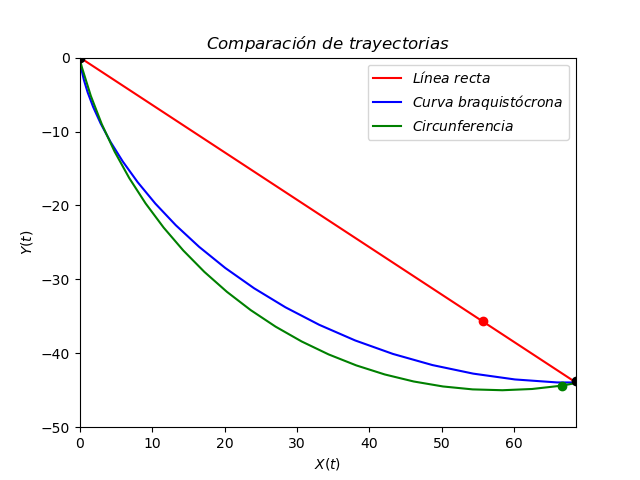

In [13]:
%matplotlib notebook
# Inicialización de gráficos
t = np.arange(0, 5.7, 0.2)  # Crear un arreglo de tiempo
fig = plt.figure()           # Crear una nueva figura
ax = plt.subplot()           # Crear un subplot en la figura

# Función para actualizar el gráfico en cada frame de la animación
def actualizar(i):
    ax.clear()  # Limpiar el subplot
    
    # Parámetros físicos
    g = 9.8
    r = 22
    tetha = np.sqrt((0.5 * g) / r)
    termino = np.sqrt(g / r)
    
    # Aceleración en x y y para la trayectoria lineal
    acx = g * np.sin(0.57) * np.cos(0.57)
    ay = -g * np.sin(0.57) ** 2
    
    # Trayectoria lineal
    line1 = ax.plot(0.5 * acx * t[i] ** 2, 0.5 * ay * t[i] ** 2, 'ro')
    ax.plot(0.5 * acx * t ** 2, 0.5 * ay * t ** 2, 'r-', label='$Línea \,\, recta$')
    
    # Trayectoria de curva braquistócrona
    line2 = ax.plot(r * termino * t[i] - r * np.sin(termino * t[i]), r * np.cos(termino * t[i]) - r, 'bo')
    ax.plot(r * termino * t - r * np.sin(termino * t), r * np.cos(termino * t) - r, 'b-', label='$Curva\,\, braquistócrona$')
    
    # Trayectoria circular
    line3 = ax.plot(58 - 60 * np.cos(np.sqrt(4.9 / 60) * t[i] * 1.2), 15 - 60 * np.sin(np.sqrt(4.9 / 60) * t[i] * 1.2), 'go')
    ax.plot(58 - 60 * np.cos(np.sqrt(4.9 / 60) * t * 1.2), 15 - 60 * np.sin(np.sqrt(4.9 / 60) * t * 1.2), 'g-', label='$Circunferencia$')
    
    # Puntos de inicio y fin
    ax.plot(0, 0, 'o', color='black')          # Punto de inicio
    ax.plot(68.53, -43.7, 'o', color='black')   # Punto de fin
    
    # Ajustes de etiquetas y límites del gráfico
    plt.title('$Comparación \,\, de \,\, trayectorias$')
    plt.xlabel('$X(t)$')
    plt.ylabel('$Y(t)$')
    ax.legend()                                # Mostrar leyenda
    ax.set_xlim(0, 68.58)                     # Límites del eje x
    ax.set_ylim(-50, 0)                        # Límites del eje y
    
    return line1, line2, line3,

# Crear la animación
ani = animation.FuncAnimation(fig, actualizar, range(len(t)))

# Mostrar la animación
plt.show()
